# Project: Investigate a Dataset (IMDB:What supports a movie being successful.)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

What determines the success of a movie a descriptive analysis.

Source data is from IMDB which includes 10866 movies, TV shows, and shorts.

Date range of media captured: January 1, 1960 to December 31, 2015.

Fields include:

* id
* imdb_id
* genres
* original_title
* tagline
* homepage
* director
* cast
* overview
* keywords	
* production_companies
* release_date
* release_year
* runtime
* budget
* budget_adj
* revenue
* revenue_adj
* popularity
* vote_count
* vote_average



#### import libraries 
I will be using pandas to load data into dataframes and perform data cleaning and analysis
I will be using matplotlib and seaborn for data visualization

In [151]:
# Use this cell to set up import statements for all of the packages that you
# plan to use.
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Populating the interactive namespace from numpy and matplotlib


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

There are several variables that could effect the success of a movie. 

I will focus on:
* INDEPENDENT VARIABLES
    * runtime
    * budget_adj
    * release_date(optional)
* DEPENDENT VARIABLES
    * poularity
    * vote_count
    * vote_average
    * revenue to budget ratio



### General Properties
* INDEPENDENT VARIABLES
    * Runtime
    * Budget_adj
    * Revenue_adj
    * Release_date(optional)

#### Loading all data and review
Loading data and reviewing first 3 rows to ensure data has loaded and become familiar with data. 

In [152]:
imdb_df = pd.read_csv('tmdb-movies.csv')
imdb_df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


#### Review data types
I want a quick reference for field names and data types. This will help if later I need to do any math and might have to convert a field from 1 type to another. 

In [153]:
imdb_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

#### Basic data stats using describe
I'm using describe to look at the spread of the data, I want to know what my max and minimum values are so I can determine if I will need to remove any data. 

In [154]:
imdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Focus on Fields for Analysis
Load and review of focus fields. In order to focus my attention I'm only bringing fields that I will be analyzing into a data frame called imdb_xydf.
I'm also looking at first 3 rows to ensure it loaded correctly.

In [155]:
imdb_xydf = imdb_df[['id', 'original_title','runtime', 'budget_adj', 'revenue_adj', 
                     'popularity','vote_count','vote_average']]
imdb_xydf.head(3)

,id,original_title,runtime,budget_adj,revenue_adj,popularity,vote_count,vote_average
0,135397,Jurassic World,124,1.379999e+08,1.392446e+09,32.985763,5562,6.5
1,76341,Mad Max: Fury Road,120,1.379999e+08,3.481613e+08,28.419936,6185,7.1
2,262500,Insurgent,119,1.012000e+08,2.716190e+08,13.112507,2480,6.3


#### Redundant review of data types over focus fields
I like to methodically repeat some processes mainly for my own data familiarity and reference

In [156]:
imdb_xydf.dtypes

id                  int64
original_title     object
runtime             int64
budget_adj        float64
revenue_adj       float64
popularity        float64
vote_count          int64
vote_average      float64
dtype: object

#### Redundant review of stats over focus fields
I like to methodically repeat some processes mainly for my own data familiarity and reference

In [157]:
imdb_xydf.describe()

,id,runtime,budget_adj,revenue_adj,popularity,vote_count,vote_average
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000
mean,66064.177434,102.070863,1.755104e+07,5.136436e+07,0.646441,217.389748,5.974922
std,92130.136561,31.381405,3.430616e+07,1.446325e+08,1.000185,575.619058,0.935142
min,5.000000,0.000000,0.000000e+00,0.000000e+00,0.000065,10.000000,1.500000
25%,10596.250000,90.000000,0.000000e+00,0.000000e+00,0.207583,17.000000,5.400000
50%,20669.000000,99.000000,0.000000e+00,0.000000e+00,0.383856,38.000000,6.000000
75%,75610.000000,111.000000,2.085325e+07,3.369710e+07,0.713817,145.750000,6.600000
max,417859.000000,900.000000,4.250000e+08,2.827124e+09,32.985763,9767.000000,9.200000


### Indvidual column review
* Count_blanks
* describe
* dtypes
* Impressions & Determination

I will be taking a closer look at each column. I would like to see if there are any blanks.
Blank data will indicate further data cleansing I may need to perform. 
I would also like create a more focused view on each columns stats and data type for building familiarty and reference and determining if there is further data cleansing that is needed.  



#### Count blanks function
I originally had this with a prompt for dynamic use but took it out to work better with project submission
This is meant to reduce the need to code counts for blanks in each of the focus fields.

In [158]:
# count blanks function
def count_blanks(x):
    field = x
    c = (imdb_df[field].isna()).sum()
    return c 

#### Runtime count blanks

In [159]:
count_blanks('runtime')

0

#### Runtime Basic stats

In [160]:
imdb_xydf.describe()['runtime']

count    10866.000000
mean       102.070863
std         31.381405
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

#### Runtime Impressions
int64

blanks = 0

Min = 0 

Max = 900 minutes

There are no blanks and data type is int64

Wiki reference:
According to the Academy of Motion Picture Arts and Sciences, the American Film Institute and the British Film Institute, a feature film runs for more than 40 minutes, while the Screen Actors Guild asserts that a feature's running time is 75 minutes or longer. Most feature films are between 75 and 210 minutes long.

#### Determination
Filter on media that is equal to or greater than 75min and equal to or less than 210 minutes

#### Budget_adj count blanks

In [161]:
count_blanks('budget_adj')

0

#### Budget_adj Basic Stats

In [162]:
imdb_xydf.describe()['budget_adj']

count    1.086600e+04
mean     1.755104e+07
std      3.430616e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.085325e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

#### Budget_adj Impressions
float64

blanks = 0

Min = 0
Max = 425m

#### Determination
425 million seemed high, according to https://www.statista.com/statistics/273416/most-expensive-film-productions-worldwide/
the most expensive movie made up to 2019 379 million

Minimum is 0 for budget. Logical test tells me while this is possible this wont factor into my analysis. 
Blair Witch project which was known for  one of the lowest budgets was still at 50,000
My initial thought is to filter on a range of 50k to 379k 

I also believe cleaning up runtime may assist in cleaning this data. I will re-run this after, runtimeclean


#### Revenue_adj count blanks

In [163]:
count_blanks('revenue_adj')

0

#### Revenue_adj basic stats

In [164]:
imdb_xydf.describe()['revenue_adj']

count    1.086600e+04
mean     5.136436e+07
std      1.446325e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.369710e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

#### Revenue_adj Impressions
float64

blanks = 0

min = 0

max = 2827123750

#### Determination
With revenue of 0 it may be that that movie has not been release yet or numbers have not been recorded. 
Action would be to only view movies that have been released and have a revenue of more than 0


#### Popularity count blanks

In [165]:
count_blanks('popularity')

0

#### Popularity basic stats

In [166]:
imdb_xydf.describe()['popularity']

count    10866.000000
mean         0.646441
std          1.000185
min          0.000065
25%          0.207583
50%          0.383856
75%          0.713817
max         32.985763
Name: popularity, dtype: float64

#### Popularity Impressions
float64

blanks = 0

min .000065
max = 32

#### Determination
Popularity score is based on rank of how many times a page has been viewed
I will need to review online more information to understand how this is created.

#### vote_count Count blanks

In [167]:
count_blanks('vote_count')

0

#### vote_count Basic Stats

In [168]:
imdb_xydf.describe()['vote_count']

count    10866.000000
mean       217.389748
std        575.619058
min         10.000000
25%         17.000000
50%         38.000000
75%        145.750000
max       9767.000000
Name: vote_count, dtype: float64

#### Vote_count Impressions
int64

blanks = 0

min = 10

mean = 217

max = 9767

This is a potential candidate for standardization. 

#### Determination
After cleaning the data I will want to review this again to see how it has been changed. 

#### vote_average Count blanks

In [169]:
count_blanks('vote_average')

0

#### vote_average Basic Stats

In [170]:
imdb_xydf.describe()['vote_average']

count    10866.000000
mean         5.974922
std          0.935142
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

#### Vote Average Impressions
float64

blanks = 0
min = 1.5
mean = 5.9
max = 9.2

#### Determination
Scenario where Movie A has 1 vote and ranks 9.2 vs Movie that has 8000 votes and ranks 8.2
how will these be balanced?

### Data Cleaning 
Overall impressions of what should be cleaned

1. runtime      : >=75min and <=210 minutes

2. budget_adj   : >=50k and <=379k 

3. revenue_adj  : Add Release date  <= then January 1 2014 (assumption 1 year of revenue)

4. popularity   : Review after data cleanse (understand metadata)

5. vote_count   : Review after data cleanse (will this need to be normalized)

6. vote_average : Review after data cleanse (ratio of number of votes to average score)

7. Release_date : Review of seasonality despite the year 

##### Add columns to data frame
To assist with data cleansing and analyis I will need to add release_date and release year to the dataframe. Bringing back first 3 records to confirm data has been loaded successfully. 
   

In [171]:
### Add release date and release year to data frame
imdb_xydf = imdb_df[['runtime', 'budget_adj', 'revenue_adj', 'release_date', 'release_year','popularity', 
         'vote_count','vote_average']]
imdb_xydf.head(3)


,runtime,budget_adj,revenue_adj,release_date,release_year,popularity,vote_count,vote_average
0,124,1.379999e+08,1.392446e+09,6/9/15,2015,32.985763,5562,6.5
1,120,1.379999e+08,3.481613e+08,5/13/15,2015,28.419936,6185,7.1
2,119,1.012000e+08,2.716190e+08,3/18/15,2015,13.112507,2480,6.3


#### 1. Runtime >=75min and <=210 minutes
Bringing back basic stats to confirm load and filters worked. 

In [172]:
imdb_xydf = imdb_xydf[imdb_xydf['runtime'] >= 75]
imdb_xydf = imdb_xydf[imdb_xydf['runtime'] <= 210]
imdb_xydf.describe()

,runtime,budget_adj,revenue_adj,release_year,popularity,vote_count,vote_average
count,10293.000000,1.029300e+04,1.029300e+04,10293.000000,10293.000000,10293.000000,10293.000000
mean,103.831536,1.839034e+07,5.401091e+07,2001.139124,0.663420,226.889245,5.940853
std,18.529553,3.488334e+07,1.479699e+08,12.857113,1.018896,589.764494,0.922849
min,75.000000,0.000000e+00,0.000000e+00,1960.000000,0.000188,10.000000,1.500000
25%,91.000000,0.000000e+00,0.000000e+00,1994.000000,0.214637,17.000000,5.400000
50%,100.000000,0.000000e+00,0.000000e+00,2005.000000,0.392011,40.000000,6.000000
75%,112.000000,2.246547e+07,3.796253e+07,2011.000000,0.731793,157.000000,6.600000
max,210.000000,4.250000e+08,2.827124e+09,2015.000000,32.985763,9767.000000,8.900000


#### 2. budget_adj: >=50k and <=379k 
Bringing back basic stats to confirm load and filters worked. 

In [173]:
imdb_xydf = imdb_xydf[imdb_xydf['budget_adj'] >= 50000]
imdb_xydf = imdb_xydf[imdb_xydf['budget_adj'] <= 379000000]
imdb_xydf.describe()

,runtime,budget_adj,revenue_adj,release_year,popularity,vote_count,vote_average
count,5022.000000,5.022000e+03,5.022000e+03,5022.000000,5022.000000,5022.000000,5022.000000
mean,107.331541,3.760775e+07,1.046701e+08,2001.254879,1.009808,418.364397,6.031760
std,18.901104,4.167733e+07,1.978771e+08,11.732375,1.343122,797.412328,0.874135
min,75.000000,5.258343e+04,0.000000e+00,1960.000000,0.001117,10.000000,2.200000
25%,94.000000,8.958710e+06,1.912704e+04,1996.000000,0.357501,37.000000,5.500000
50%,103.000000,2.340083e+07,3.115261e+07,2005.000000,0.635365,128.000000,6.100000
75%,117.000000,5.066001e+07,1.160687e+08,2010.000000,1.176155,414.000000,6.600000
max,208.000000,3.683713e+08,2.827124e+09,2015.000000,32.985763,9767.000000,8.400000


#### 3. Revenue_adj :  Release_year < 2015 (assumption 1 year of revenue) and revenue_adj >0
Bringing back basic stats to confirm load and filters worked. 

In [174]:
imdb_xydf = imdb_xydf[imdb_xydf['release_year']< 2015]
imdb_xydf = imdb_xydf[imdb_xydf['revenue_adj']>0]
imdb_xydf.head(3)

,runtime,budget_adj,revenue_adj,release_date,release_year,popularity,vote_count,vote_average
629,169,1.519800e+08,5.726906e+08,11/5/14,2014,24.949134,6498,8.0
630,121,1.565855e+08,7.122911e+08,7/30/14,2014,14.311205,5612,7.9
631,136,1.565855e+08,6.583651e+08,3/20/14,2014,12.971027,3848,7.6


#### Repeat individual field Basic stats
Field focus and review of any issues
* Popularity
* vote_count
* vote_average

In [175]:
imdb_xydf.describe()['popularity']

count    3640.000000
mean        1.128213
std         1.236788
min         0.001117
25%         0.458048
50%         0.786394
75%         1.320533
max        24.949134
Name: popularity, dtype: float64

In [176]:
imdb_xydf.describe()['vote_count']

count    3640.000000
mean      514.283516
std       866.680692
min        10.000000
25%        69.000000
50%       197.000000
75%       557.000000
max      9767.000000
Name: vote_count, dtype: float64

In [177]:
imdb_xydf.describe()['vote_average']

count    3640.000000
mean        6.161923
std         0.792050
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

### Add field rb_ratio(revenue to budget)
After reviewing numbers it makes since to create a field for profit that will be labled rb_ratio.
Loading data below and bringing back first 3 records to confirm load

In [178]:
imdb_xydf['rb_ratio'] = imdb_xydf['revenue_adj']/imdb_xydf['budget_adj']
(imdb_xydf).head(3)

,runtime,budget_adj,revenue_adj,release_date,release_year,popularity,vote_count,vote_average,rb_ratio
629,169,1.519800e+08,5.726906e+08,11/5/14,2014,24.949134,6498,8.0,3.768197
630,121,1.565855e+08,7.122911e+08,7/30/14,2014,14.311205,5612,7.9,4.548896
631,136,1.565855e+08,6.583651e+08,3/20/14,2014,12.971027,3848,7.6,4.204509


### Add release_month 
after looking at dates it makes sense to load just the month from the release date to see if there is a specific time of year that might have an influence in success. I have brought back 3 records to confirm data is loaded correctly.

In [179]:
import datetime
imdb_xydf['release_month'] = pd.DatetimeIndex(imdb_xydf["release_date"]).month
imdb_xydf.head(3)

,runtime,budget_adj,revenue_adj,release_date,release_year,popularity,vote_count,vote_average,rb_ratio,release_month
629,169,1.519800e+08,5.726906e+08,11/5/14,2014,24.949134,6498,8.0,3.768197,11
630,121,1.565855e+08,7.122911e+08,7/30/14,2014,14.311205,5612,7.9,4.548896,7
631,136,1.565855e+08,6.583651e+08,3/20/14,2014,12.971027,3848,7.6,4.204509,3


## Sum group by month
In order to review data over time I will need to group by month, sum popularity, vote_count, vote_average, rb_ratio. 
I have done this below and confirmed the load by reviewing the data types. 

In [180]:
df = imdb_xydf
sum_by_month = df.groupby(['release_month'],as_index = False)[["popularity", "vote_count", 
                                                               "vote_average", 
                                                               "rb_ratio"]].sum()
sum_by_month.dtypes

release_month      int64
popularity       float64
vote_count         int64
vote_average     float64
rb_ratio         float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

## Is there a correlation between runtime, budget, release date and success of a movie

> Criteria definining success, ratio of revenue_adj to budget_adj, popularity, vote_count, vote_average. 

> Factors to test success influence: runtime, budget, release_date

1. Review Popularity against, runtime, budget_adj and release_month
2. Review vote_count against, runtime, budget_adj and release_month
3. Review vote_average against, runtime, budget_adj and release_month
4. Review rb_ratio against, runtime, budget_adj and release_month


#### Automation of R score calculation
Because I will want to calculate the r score several times I have created a function to automate this for me. 


In [181]:
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    
    return (std_x * std_y).mean()

### 1. Review Popularity against, runtime, budget_adj and release_month

#### Are longer movies more popular?
I'm using a scatter plot to determine if there is a relationship between the variables being tested. 

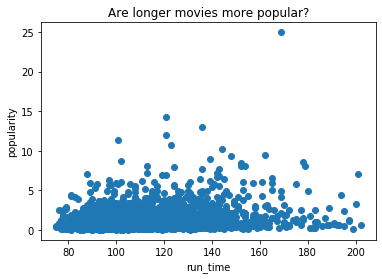

In [182]:
# Load Data
x = imdb_xydf['runtime']
y = imdb_xydf['popularity']

# Create Plot
plt.xlabel('run_time')
plt.ylabel('popularity')
plt.title('Are longer movies more popular?')
plt.scatter(x,y)



#### R Score
I have created an r score to compliment the scatter plot and help interpret the strenght or weakeness of the relationships tested.


In [183]:
pop_runtime = correlation(x, y)
print(pop_runtime)

0.24094274969777796


#### Are bigger budget movies  movies more popular?
I'm using a scatter plot to determine if there is a relationship between the variables being tested. 

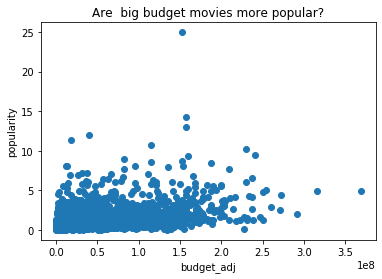

In [184]:
# Load data
x = imdb_xydf['budget_adj']

# Create Plot
plt.xlabel('budget_adj')
plt.ylabel('popularity')
plt.title('Are  big budget movies more popular?')
plt.scatter(x,y)

#### R Score
I have created an r score to compliment the scatter plot and help interpret the strenght or weakeness of the relationships tested.

In [185]:
pop_budget_adj = correlation(x, y)
print(pop_budget_adj)

0.4271092614196272


#### Does release date help a movie be more popular?
I'm using a line chart to determine if there is a relationship between the variables being tested. 

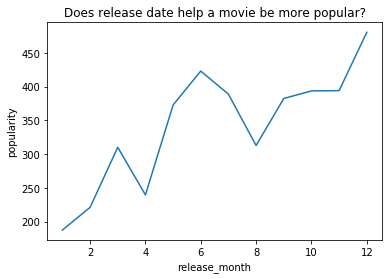

In [186]:

x = sum_by_month['release_month']
y = sum_by_month['popularity']

# Create Plot
plt.xlabel('release_month')
plt.ylabel ('popularity')
plt.title('Does release date help a movie be more popular?')
plt.plot(x,y)

#### R Score
I have created an r score to compliment the scatter plot and help interpret the strenght or weakeness of the relationships tested.

In [187]:
pop_release_month = correlation(x, y)
print(pop_release_month)

0.8323988707767832


> #### Popularity Observations
>Popularity is the rank of movie sites that are visited per week. 
Correlation of runtime and budget is not strong enough to investigate.
Release_month and popularity are correlated with an R score of .83 and is worth
investigating further.

> * Weak to No positive relationship with popularity and runtime
> * Moderate to Weak relationship with popularity and budget_adj
> * Strong to Perfect positive correlation with popularity and release_month

In [188]:
print("popularity and runtime", pop_runtime)
print("popularity and budget_adj", pop_budget_adj)
print("popularity and month released",pop_release_month)

popularity and runtime 0.24094274969777796
popularity and budget_adj 0.4271092614196272
popularity and month released 0.8323988707767832


### 2. Review vote_count against, runtime, budget_adj and release_month

#### Do longer movies get more votes?
I'm using a scatterplot to determine if there is a relationship between the variables being tested. 

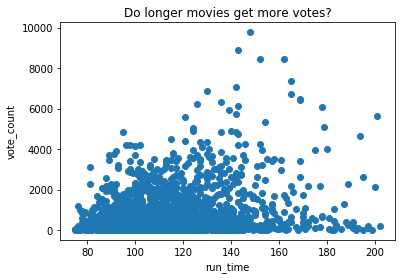

In [189]:
# Load Data
x = imdb_xydf['runtime']
y = imdb_xydf['vote_count']

# Create Plot
plt.xlabel('run_time')
plt.ylabel('vote_count')
plt.title('Do longer movies get more votes?')
plt.scatter(x,y)

#### R Score
I have created an r score to compliment the scatter plot and help interpret the strenght or weakeness of the relationships tested.

In [190]:
vc_runtime = correlation(x, y)
print(vc_runtime)

0.2831731290856433


#### Do Bigger budget movies get more votes?
I'm using a scatterplot to determine if there is a relationship between the variables being tested. 

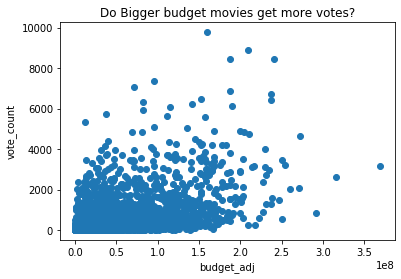

In [191]:
# Load Data
x = imdb_xydf['budget_adj']

# Create Plot
plt.xlabel('budget_adj')
plt.ylabel('vote_count')
plt.title('Do Bigger budget movies get more votes?')
plt.scatter(x,y)

#### R Score
I have created an r score to compliment the scatter plot and help interpret the strenght or weakeness of the relationships tested.

In [192]:
vc_budget_adj = correlation(x, y)
print(vc_budget_adj)

0.4946701719635949


#### Does release date cause more people to vote?
I'm using a linechart to determine if there is a relationship between the variables being tested. 

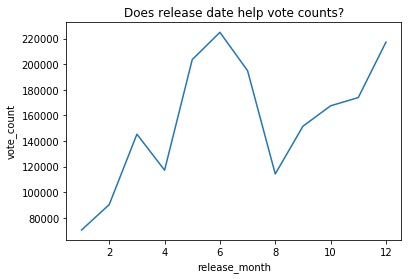

In [193]:
# Load Data
x = sum_by_month['release_month']
y = sum_by_month['vote_count']

# Create Plot
plt.xlabel('release_month')
plt.ylabel ('vote_count')
plt.title('Does release date help vote counts?')
plt.plot(x,y)

#### R Score
I have created an r score to compliment the scatter plot and help interpret the strenght or weakeness of the relationships tested.

In [194]:
vc_release_month = correlation(x, y)
print(vc_release_month)

0.6013983137510127


> #### Vote Counts Observations
> Vote counts is how many times people have voted on a movie.
Correlation of vote_count and release_date with an R score of .60 is worth investigating.


>  * Weak to No positive relationship with vote counts and runtime
>  * Moderate to Weak positiverelationship with vote counts and budget_adj
>  * Strong to Moderate positive correlation with vote counts and release_month

In [195]:
print("vote counts and runtime", vc_runtime)
print("vote counts and budget_adj", vc_budget_adj)
print("vote counts and month released",vc_release_month)

vote counts and runtime 0.2831731290856433
vote counts and budget_adj 0.4946701719635949
vote counts and month released 0.6013983137510127


### 3. Review vote_average against, runtime, budget_adj and release_month
#### Do longer movies have a higher vote average?
I'm using a scatterplot to determine if there is a relationship between the variables being tested. 

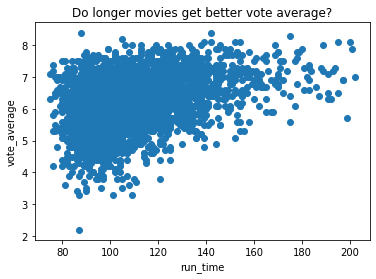

In [212]:
# Load Data
y = imdb_xydf['vote_average']
x = imdb_xydf['runtime']

# Create Plot
plt.xlabel('run_time')
plt.ylabel('vote_average')
plt.title('Do longer movies get better vote average?')
plt.scatter(x,y)


#### R Score
I have created an r score to compliment the scatter plot and help interpret the strenght or weakeness of the relationships tested.

In [213]:
va_runtime = correlation(x, y)
print(va_runtime)

0.37555123485275116


#### Do Bigger budget movies have higher vote averages?
I'm using a scatterplot to determine if there is a relationship between the variables being tested. 

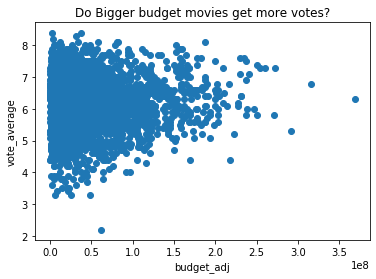

In [214]:
# Load data
x = imdb_xydf['budget_adj']

# Create Plot
plt.xlabel('budget_adj')
plt.ylabel('vote_average')
plt.title('Do Bigger budget movies get more votes?')
plt.scatter(x,y)

#### R Score
I have created an r score to compliment the scatter plot and help interpret the strenght or weakeness of the relationships tested.

In [215]:
va_budget_adj = correlation(x, y)
print(correlation(x, y))

0.02994929961046079


#### Does release date help vote averages?
I'm using a line chart to determine if there is a relationship between the variables being tested. 

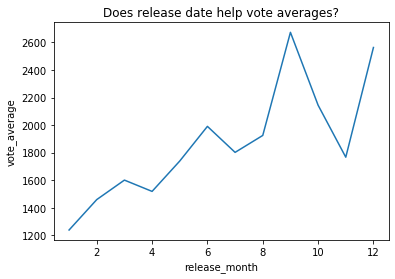

In [216]:
# Load Data
x = sum_by_month['release_month']
y = sum_by_month['vote_average']

# Create Plot
plt.xlabel('release_month')
plt.ylabel ('vote_average')
plt.title('Does release date help vote averages?')
plt.plot(x,y)

#### R Score
I have created an r score to compliment the scatter plot and help interpret the strenght or weakeness of the relationships tested.

In [217]:
va_release_month = correlation(x, y)
print(va_release_month)

0.803939299883304


> #### Vote Averages Observations
> Vote counts is how many times people have voted on a movie.
Correlation of vote_count and release_date with an R score of .60 is worth investigating.


>  * Weak to No positive relationship with vote averages and runtime
>  * No relationship with vote averages and budget_adj
>  * Strong to Perfect positive correlation with vote averages and release_month

In [218]:
print("vote averages and runtime", va_runtime)
print("vote averages and budget_adj", va_budget_adj)
print("vote averages and month released",va_release_month)

vote averages and runtime 0.37555123485275116
vote averages and budget_adj 0.02994929961046079
vote averages and month released 0.803939299883304


### 4. Review rb_ratio against, runtime, budget_adj and release_month
#### Do longer movies net more profit?
I'm using a scatterplot to determine if there is a relationship between the variables being tested. 

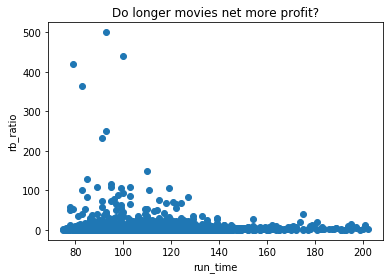

In [219]:
# Load Data
x = imdb_xydf['runtime']
y = imdb_xydf['rb_ratio']

# Create Plot
plt.xlabel('run_time')
plt.ylabel('rb_ratio')
plt.title('Do longer movies net more profit?')
plt.scatter(x,y)

#### R Score
I have created an r score to compliment the scatter plot and help interpret the strenght or weakeness of the relationships tested.

In [220]:
rb_runtime = correlation(x, y)
print(rb_runtime)

-0.042847692146863736


#### Do more profitable movies get more votes?
I'm using a scatterplot to determine if there is a relationship between the variables being tested. 

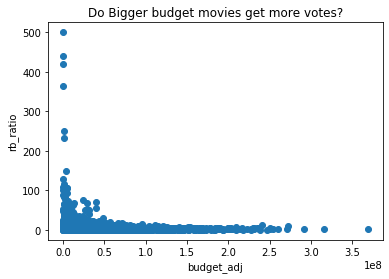

In [221]:
# Load Data
x = imdb_xydf['budget_adj']

# Create Plot
plt.xlabel('budget_adj')
plt.ylabel('rb_ratio')
plt.title('Do Bigger budget movies get more votes?')
plt.scatter(x,y)

#### R Score
I have created an r score to compliment the scatter plot and help interpret the strenght or weakeness of the relationships tested.

In [222]:
rb_budget_adj = correlation(x, y)
print(rb_budget_adj)

-0.10186377644837269


#### Does release date help with profit
I'm using a line chart to determine if there is a relationship between the variables being tested. 

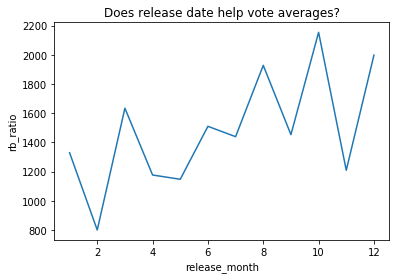

In [223]:
# Load Data
x = sum_by_month['release_month']
y = sum_by_month['rb_ratio']

# Create Plot
plt.xlabel('release_month')
plt.ylabel ('rb_ratio')
plt.title('Does release date help vote averages?')
plt.plot(x,y)




#### R Score
I have created an r score to compliment the scatter plot and help interpret the strenght or weakeness of the relationships tested.

In [224]:
rb_release_month = (correlation(x, y))
print(rb_release_month)

0.5857341759708116


> #### rb_ratio (revenue to budget) Observations
>  * Moderate to Weak Correlation between profit and runtime
>  * No correlation between profit and budget_adj
>  * Moderate to Strong positive correlation with profit and release month release month. 

In [225]:
print("revenue to budget and runtime", rb_runtime)
print("revenue to budget and budget_adj", rb_budget_adj)
print("revenue to budget and month released",rb_release_month)

revenue to budget and runtime -0.042847692146863736
revenue to budget and budget_adj -0.10186377644837269
revenue to budget and month released 0.5857341759708116


### REVIEW of Correlations by Dependent variables
printing out each of the correlations and grouped by the category of dependent variable for a different look at the same data. 

In [226]:
print("RUNTIME")
print("popularity and runtime", pop_runtime)
print("vote counts and runtime", vc_runtime)
print("vote averages and runtime", va_runtime)
print("revenue to budget and runtime", rb_runtime)
print("")

print("BUDGET_ADJ")
print("popularity and budget_adj", pop_budget_adj)
print("vote counts and budget_adj", vc_budget_adj)
print("vote averages and budget_adj", va_budget_adj)
print("revenue to budget and budget_adj", rb_budget_adj)
print("")

print("MONTH RELEASED")
print("popularity and month released",pop_release_month)
print("vote counts and month released",vc_release_month)
print("vote averages and month released",va_release_month)
print("revenue to budget and month released",rb_release_month)
print("")

RUNTIME
popularity and runtime 0.24094274969777796
vote counts and runtime 0.2831731290856433
vote averages and runtime 0.37555123485275116
revenue to budget and runtime -0.042847692146863736

BUDGET_ADJ
popularity and budget_adj 0.4271092614196272
vote counts and budget_adj 0.4946701719635949
vote averages and budget_adj 0.02994929961046079
revenue to budget and budget_adj -0.10186377644837269

MONTH RELEASED
popularity and month released 0.8323988707767832
vote counts and month released 0.6013983137510127
vote averages and month released 0.803939299883304
revenue to budget and month released 0.5857341759708116



### Limitations
* There were No indicators as to media types. IE cannot determine if all data represents movies or if TV shows, video games etc. are included.

* I found data that is inaccurate in the database. One example the movie, "The Warriors way" cost 425million to make after a google search I found it was only 40 million to make. No clear way on validating accuracy of all data.

* Based on time I did not have the ability to split out more data and store to review the influences like Actors and directors. They are seperated with "|" and I would like to store them in a different dataframe to review how directors and actors affect success of a movie. 

### Conclusions
I loaded IMDB data provided. I decided to review all fields and focus on measures from the data set that might influence a movies success. 
First I had to define from the variables what would be a measure of success. I chose. 
* DEPENDENT VARIABLES
    * poularity
    * vote_count
    * vote_average
    * revenue to budget ratio
I then reviewed other variables to find feasible ones for a quick analyis to see if there might be relationship between the new variables and the increased chance of success for a movie. 
* INDEPENDENT VARIABLES
    * runtime
    * budget_adj
    * release_date(optional)
The dataset includes more than movies, so I removed any media that was less than 75min and longer than 210. Plus had revenue of more than 0 and cost more than 50k to make in order to try and increase chances that the media reviewed was movies that had been released. 
#### Assumption 
* movies that made 0 in revenue have not been released
* movies that cost less than 50k and more than 379k would remove inaccurate data. Google search showed biggest budget for a movie was 379 so anything over that would be inaccurate. 50k was the cost of a low budget film Blair witch. And while other films like Primer only cost 7k to make there were to many movies that would create noise in the data under 50k
* movies are evenly distributed throughout the year. (this may be a next step for normalizing data)

#### Observervations
 After cleaning the data I reviewed scatter plots and correlation scoring to determine the strength of influence between Variable"A" and Variable"B".

Based on the I have concluded.
Runtime and Budget_adj have weak correlated relationships to the success of a movie. 
Month Released has Moderate to Strong correlations across all categories.

When a movie is release has a strong relationship to the success of a movie; How many people will visit its web page, vote on the movie, the average score of the vote and the and the overall profit. If I were to release a movie I would do so in June or December. 

I do suspect that further analyis is needed though which I have outlined in Next Steps.

>Next Steps
1. Count all movies by month and normalize the distribution of counts.
2. Re-run Month released analyis on standardized month_release data. 
3. Add director and actor tests to independent variables to review correlations with independent variables.
4. Test process with only current 5 years of movies